In [1]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
with open('speaker_data.json', "r") as f:
    data = json.load(f)

In [3]:
X = np.array(data["mfcc"], dtype = 'float32')
y = np.array(data["label"])

In [4]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=0)

In [6]:
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

In [7]:
import tensorflow as tf
gpu = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpu[0], True)

In [9]:
model = tf.keras.models.Sequential()


model.add(tf.keras.layers.Conv2D(32,kernel_size=(5,5),input_shape=(x_train.shape[1],x_train.shape[2],1),padding='same',kernel_initializer='he_uniform',activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation = "relu", kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Dense(128, activation = "relu", kernel_initializer='he_uniform'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(64, activation = "relu", kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Dense(64, activation = "relu", kernel_initializer='he_uniform'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(5, activation = "softmax"))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 5, 13, 32)         832       
_________________________________________________________________
batch_normalization (BatchNo (None, 5, 13, 32)         128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 2, 6, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 384)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               49280     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               5

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(x_train,
                    y_train,
                    validation_data=(x_test, y_test),
                    batch_size=16,
                    epochs=100)

Epoch 1/100
4220/4220 [==============================] - 10s 2ms/step - loss: 0.4290 - accuracy: 0.8456 - val_loss: 0.2393 - val_accuracy: 0.9169
Epoch 2/100
4220/4220 [==============================] - 9s 2ms/step - loss: 0.2324 - accuracy: 0.9215 - val_loss: 0.1600 - val_accuracy: 0.9431
Epoch 3/100
4220/4220 [==============================] - 9s 2ms/step - loss: 0.1838 - accuracy: 0.9381 - val_loss: 0.1123 - val_accuracy: 0.9603
Epoch 4/100
4220/4220 [==============================] - 9s 2ms/step - loss: 0.1580 - accuracy: 0.9471 - val_loss: 0.1323 - val_accuracy: 0.9564
Epoch 5/100
4220/4220 [==============================] - 9s 2ms/step - loss: 0.1417 - accuracy: 0.9529 - val_loss: 0.1035 - val_accuracy: 0.9651
Epoch 6/100
4220/4220 [==============================] - 10s 2ms/step - loss: 0.1265 - accuracy: 0.9582 - val_loss: 0.1039 - val_accuracy: 0.9649
Epoch 7/100
4220/4220 [==============================] - 9s 2ms/step - loss: 0.1186 - accuracy: 0.9610 - val_loss: 0.0966 - val_

Epoch 57/100
4220/4220 [==============================] - 10s 2ms/step - loss: 0.0339 - accuracy: 0.9884 - val_loss: 0.0761 - val_accuracy: 0.9751
Epoch 58/100
4220/4220 [==============================] - 10s 2ms/step - loss: 0.0322 - accuracy: 0.9891 - val_loss: 0.0713 - val_accuracy: 0.9779
Epoch 59/100
4220/4220 [==============================] - 12s 3ms/step - loss: 0.0320 - accuracy: 0.9889 - val_loss: 0.0887 - val_accuracy: 0.9727
Epoch 60/100
4220/4220 [==============================] - 10s 2ms/step - loss: 0.0318 - accuracy: 0.9892 - val_loss: 0.0732 - val_accuracy: 0.9775
Epoch 61/100
4220/4220 [==============================] - 12s 3ms/step - loss: 0.0307 - accuracy: 0.9894 - val_loss: 0.0693 - val_accuracy: 0.9789
Epoch 62/100
4220/4220 [==============================] - 11s 3ms/step - loss: 0.0302 - accuracy: 0.9897 - val_loss: 0.0742 - val_accuracy: 0.9769
Epoch 63/100
4220/4220 [==============================] - 11s 3ms/step - loss: 0.0309 - accuracy: 0.9896 - val_loss: 0

In [13]:
import matplotlib.pyplot as plt

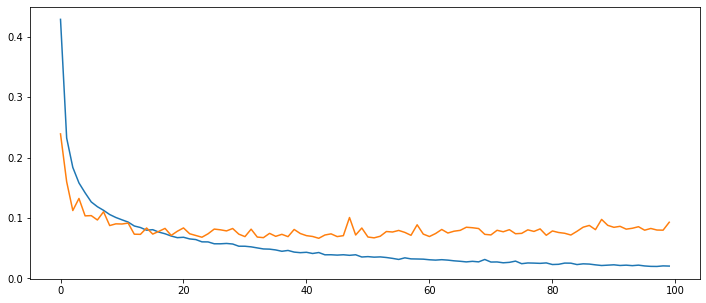

In [16]:
plt.rcParams['figure.figsize'] = 12,5
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

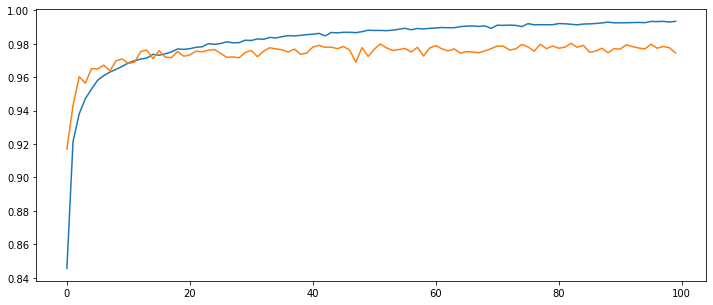

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [56]:
loss , acc = model.evaluate(x_test, y_test)
print(f'loss {np.round(loss, 4)}')
print(f'accuracy {np.round((acc*100),4)}')

235/235 [==============================] - 0s 1ms/step - loss: 0.0929 - accuracy: 0.9745
loss 0.0929
accuracy 97.4537


In [57]:
from sklearn.metrics import confusion_matrix, classification_report

In [58]:
y_pred = model.predict(x_test)

In [62]:
labels = data['mapping']

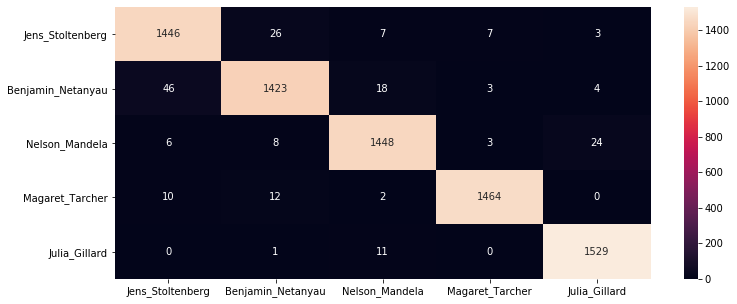

In [63]:
import seaborn as sns
matrix = confusion_matrix(y_test, y_pred.argmax(axis=1))
sns.heatmap(matrix,annot=True, fmt='d', yticklabels=labels, xticklabels=labels)

In [65]:
print(classification_report(y_test, y_pred.argmax(axis=1), target_names= labels))

                   precision    recall  f1-score   support

 Jens_Stoltenberg       0.96      0.97      0.96      1489
Benjamin_Netanyau       0.97      0.95      0.96      1494
   Nelson_Mandela       0.97      0.97      0.97      1489
  Magaret_Tarcher       0.99      0.98      0.99      1488
    Julia_Gillard       0.98      0.99      0.99      1541

         accuracy                           0.97      7501
        macro avg       0.97      0.97      0.97      7501
     weighted avg       0.97      0.97      0.97      7501

